<a href="https://colab.research.google.com/github/MrinmoyIITK/Projects-using-ML/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

In [66]:
data = pd.read_csv("Real estate.csv")
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [35]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 lat

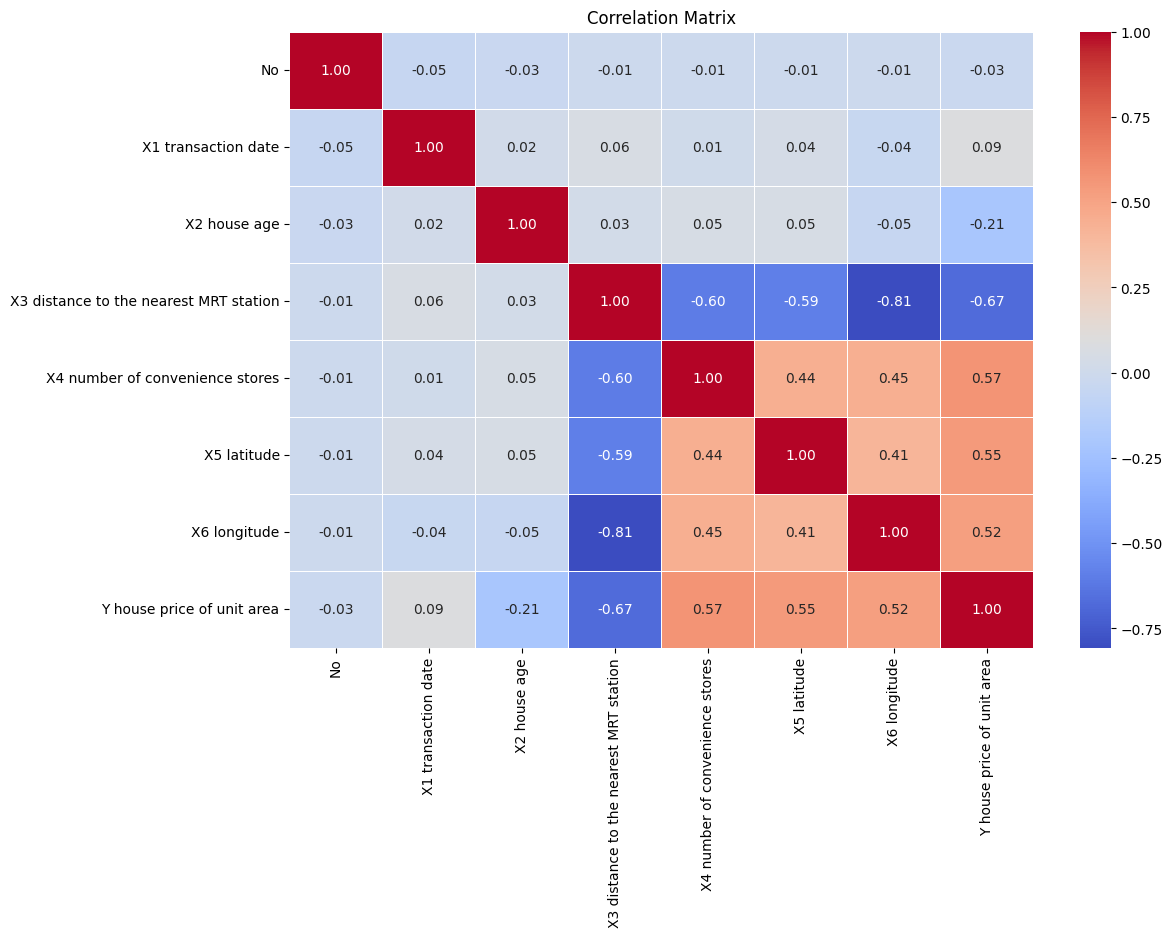

In [36]:
# Plotting the heatmap
correlation_matrix = data.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


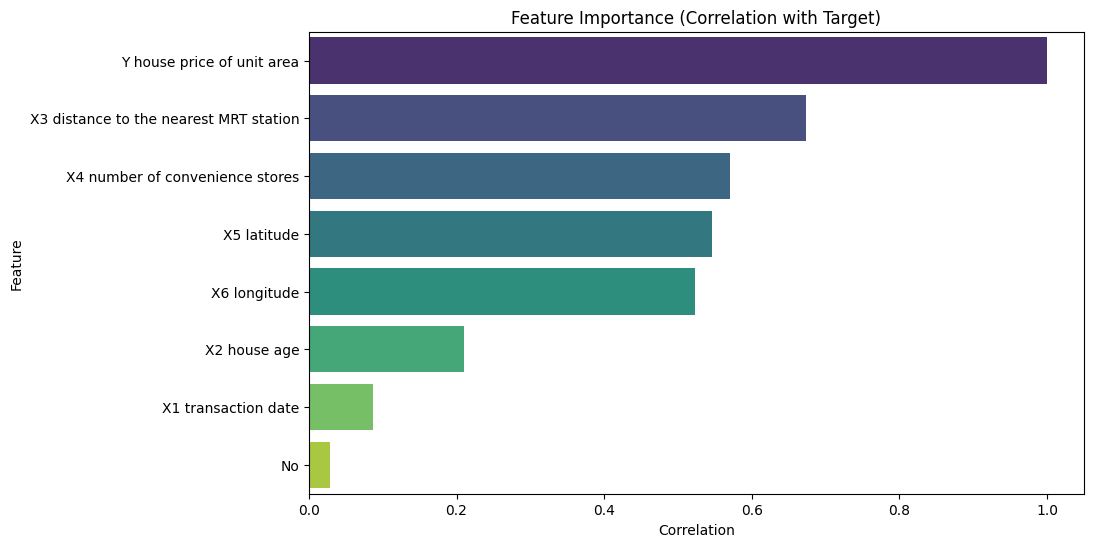

In [37]:
# Calculate correlation with the target variable
correlation_with_target = data.corr()['Y house price of unit area'].abs().sort_values(ascending=False)

# Plotting the feature importance based on correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title("Feature Importance (Correlation with Target)")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

Calculating VIF

In [38]:
# Function to calculate VIF
def calculate_vif(data_frame):
    features = data_frame.columns
    X = data_frame[features]
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Check for multicollinearity
vif_result = calculate_vif(data)
print(vif_result)

                                 Variable           VIF
0                                      No  4.035744e+00
1                     X1 transaction date  4.326819e+07
2                            X2 house age  3.896288e+00
3  X3 distance to the nearest MRT station  5.337289e+00
4         X4 number of convenience stores  5.163691e+00
5                             X5 latitude  6.509160e+06
6                            X6 longitude  4.401601e+07
7              Y house price of unit area  2.092601e+01


Explolatary Data Analysis

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

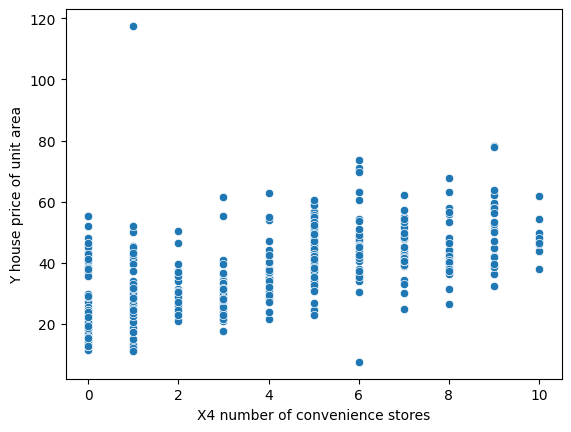

In [39]:
sns.scatterplot(x='X4 number of convenience stores',
                y='Y house price of unit area', data= data)


<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

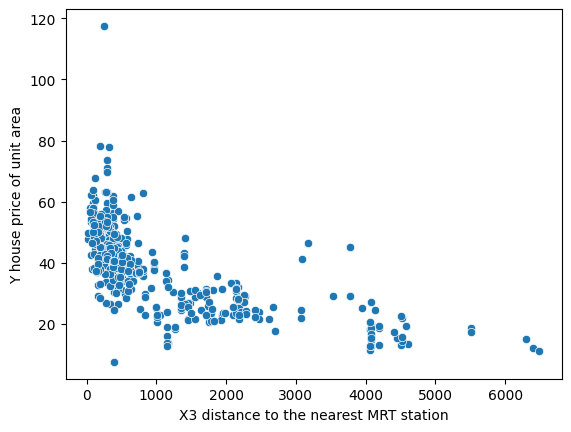

In [40]:
sns.scatterplot(x = 'X3 distance to the nearest MRT station',
               y='Y house price of unit area', data = data)


<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

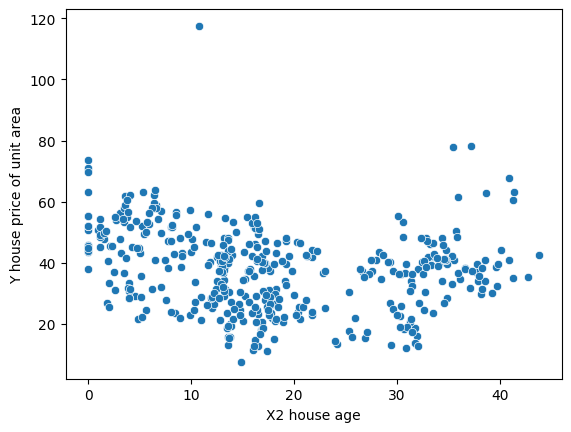

In [41]:
sns.scatterplot(x = 'X2 house age', y='Y house price of unit area',data = data)

Dropping the insignificant features

In [42]:
X= data.drop(['Y house price of unit area','X1 transaction date','No'],axis= 1)
y= data['Y house price of unit area']

In [43]:
y


0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

Train and Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (289, 5)
X_test shape: (125, 5)
y_train shape: (289,)
y_test shape: (125,)


Linear Regression

In [45]:
LR = LinearRegression()

# Fit the model to the data
LR.fit(X_train, y_train)
intercept = LR.intercept_
coefficients = LR.coef_

# Print the results
print(f'Intercept: {intercept:.4f}')
print(f'Coefficients: {coefficients}')




Intercept: -530.1680
Coefficients: [-2.41812812e-01 -4.89206784e-03  1.08602173e+00  2.52060774e+02
 -4.70680469e+01]


In [46]:
predictions_LR = LR.predict(X_test)

In [47]:
print("MAE_LR", mean_absolute_error(y_test,predictions_LR))
print("MSE_LR", mean_squared_error(y_test,predictions_LR))
print("R2 score_LR", r2_score(y_test,predictions_LR))

MAE_LR 6.151521273181792
MSE_LR 74.05926303147854
R2 score_LR 0.557128350500776


Decision Tree

In [48]:
# Initialize the decision tree regressor
DT_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
DT_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions_DT = DT_regressor.predict(X_test)


In [49]:
predictions_DT

array([51.5 , 35.1 , 43.5 , 29.3 , 25.7 , 42.3 , 42.1 , 51.7 , 12.8 ,
       58.1 , 30.7 , 30.9 , 48.  , 13.8 , 34.2 , 23.  , 42.3 , 47.7 ,
       21.8 , 34.4 , 18.3 , 20.9 , 52.2 , 36.3 , 16.1 , 33.1 , 12.8 ,
       43.5 , 67.7 , 35.3 , 15.6 , 21.7 , 34.1 , 26.6 , 48.4 , 41.4 ,
       52.7 , 15.9 , 36.2 , 60.7 , 32.5 , 47.  , 48.  , 36.6 , 39.3 ,
       47.9 , 31.6 , 22.  , 47.7 , 46.1 , 51.5 , 55.  , 40.3 , 36.5 ,
       36.8 , 15.9 , 41.1 , 22.8 , 25.7 , 51.7 , 27.7 , 21.5 , 15.9 ,
       15.6 , 15.  , 20.9 , 28.35, 31.6 , 39.6 , 25.3 , 29.3 , 40.3 ,
       47.7 , 52.5 , 32.4 , 43.9 , 36.6 , 26.9 , 55.3 , 31.1 , 38.1 ,
       42.1 , 28.4 , 60.7 , 23.1 , 27.7 , 38.1 , 41.6 , 31.3 , 24.5 ,
       29.3 , 36.5 , 42.75, 47.3 , 31.6 , 32.4 , 22.9 , 38.1 , 25.7 ,
       53.9 , 23.2 , 32.5 , 40.6 , 20.8 , 47.7 , 53.5 , 24.8 , 17.7 ,
       36.5 , 36.6 , 34.6 , 29.3 , 41.6 , 41.6 , 22.  , 47.7 , 51.7 ,
       48.  , 29.7 , 28.35, 40.6 , 29.3 , 69.4 , 51.5 , 37.8 ])

In [50]:
print("MAE_DT", mean_absolute_error(y_test,predictions_DT))
print("MSE_DT", mean_squared_error(y_test,predictions_DT))
print("R2 score_DT", r2_score(y_test,predictions_DT))

MAE_DT 5.493999999999998
MSE_DT 67.48469999999996
R2 score_DT 0.5964439938828865


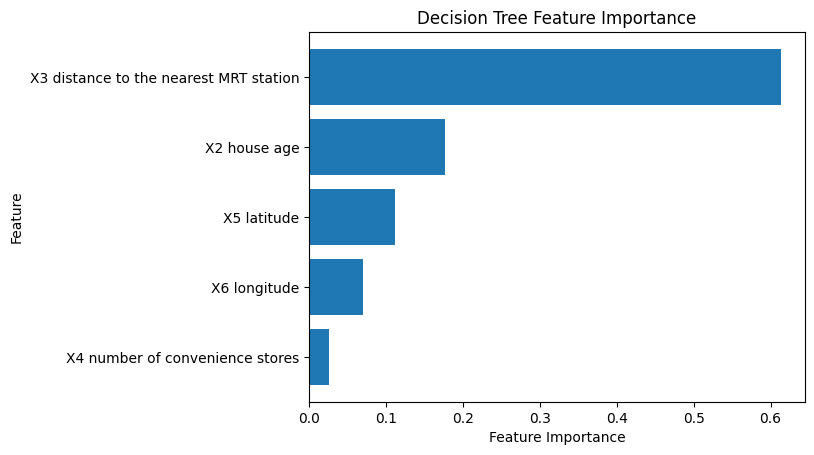

In [51]:
feature_importances = DT_regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)

plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_importances)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

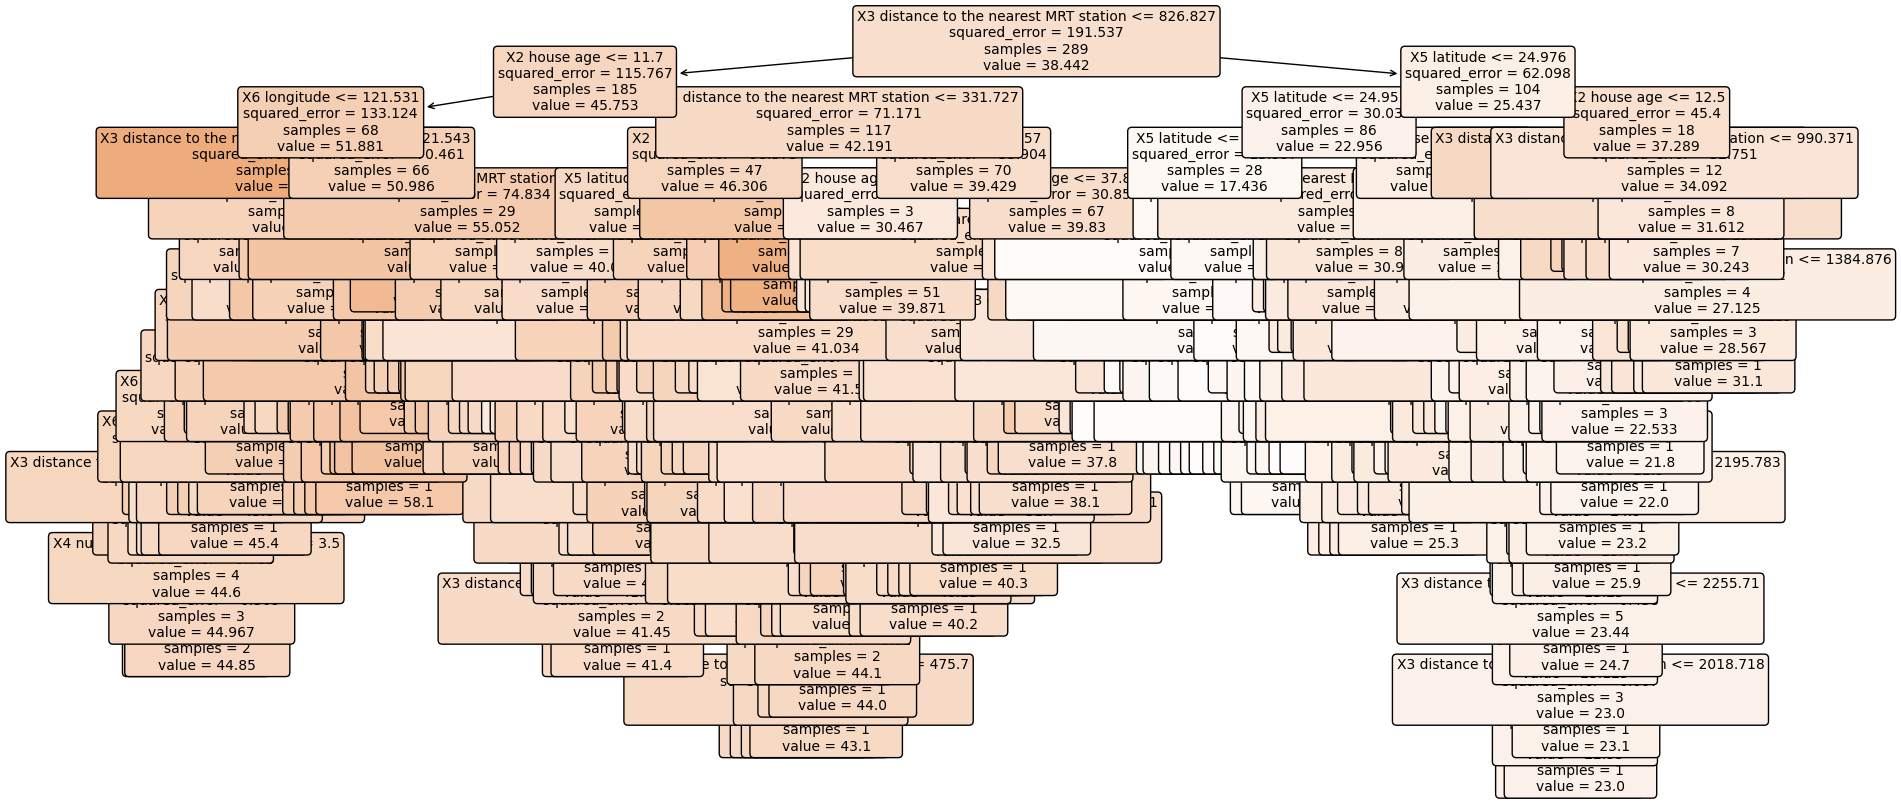

In [52]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(DT_regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()



Random Forest

In [53]:
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
predictions_RF= random_forest.predict(X_test)

In [54]:
predictions_RF

array([50.57088333, 36.59786667, 54.44615476, 34.732     , 25.875     ,
       39.36      , 44.9852381 , 50.61517143, 14.339     , 60.04105   ,
       26.594     , 30.86821429, 33.755     , 14.879     , 36.641     ,
       23.97166667, 40.73766667, 51.9642    , 24.598     , 37.37666667,
       18.266     , 22.656     , 49.278     , 45.29251667, 15.7963    ,
       36.123     , 15.956     , 54.44615476, 54.128     , 39.67466667,
       15.709     , 24.195     , 38.146     , 26.61175   , 48.99976667,
       37.976     , 53.93185714, 15.0928    , 39.968     , 56.204     ,
       41.07783333, 43.5       , 47.295     , 39.458     , 39.73201667,
       50.49366667, 34.84025   , 23.239     , 49.54373333, 47.281     ,
       50.57088333, 55.326     , 40.716     , 40.34266667, 40.91896667,
       15.1008    , 42.31558333, 28.0165    , 25.744     , 50.61517143,
       26.119     , 25.13      , 15.1008    , 17.186     , 17.28      ,
       22.76      , 26.955     , 38.09391667, 37.162     , 26.42

In [55]:
print("MAE_RF", mean_absolute_error(y_test,predictions_RF))
print("MSE_RF", mean_squared_error(y_test,predictions_RF))
print("R2 score_RF", r2_score(y_test,predictions_RF))

MAE_RF 4.47531734285714
MSE_RF 43.06536985288584
R2 score_RF 0.7424706835803232


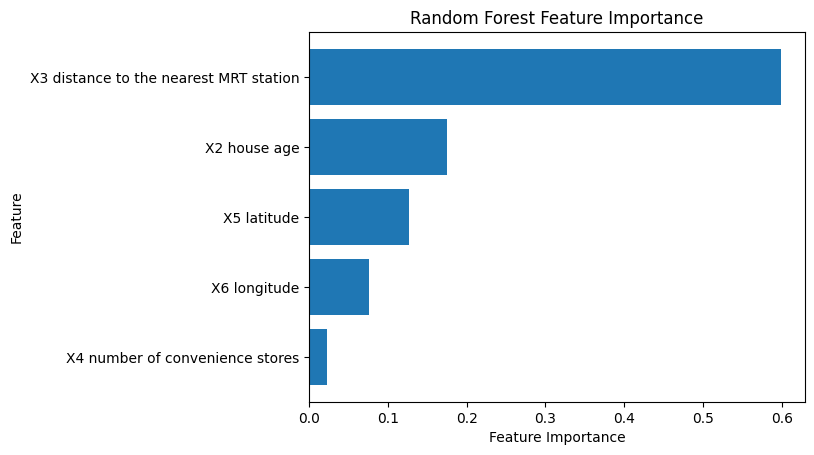

In [56]:
# Plot feature importances
feature_importances = random_forest.feature_importances_
sorted_indices = np.argsort(feature_importances)

plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_importances)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

Ridge and Lasso Regression

In [57]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Perform grid search for the best alpha
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_lasso)

    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Print the best alpha value
print(f'Best Alpha for Lasso: {best_alpha}')

Best Alpha for Lasso: 0.01


In [58]:
y_pred_lasso

array([44.95525342, 42.72542103, 44.35472733, 45.13038356, 30.08548682,
       43.2308036 , 44.24041294, 44.24041294, 37.84163108, 45.7252571 ,
       34.57585665, 30.36736037, 32.45903501, 37.73483839, 40.39246496,
       33.57930166, 43.62872599, 45.9789807 , 29.51576657, 43.53889709,
       -1.35690545, 33.08661281, 43.48448232, 44.01831582, 15.06133264,
       45.00081521, 15.97681688, 44.35472733, 45.14927369, 43.40001956,
       12.65458861, 34.75426756, 43.47046406, 35.83682863, 43.9840881 ,
       42.73950798, 45.7252571 , 15.92246857, 43.18176991, 44.30103905,
       42.07601131, 42.38520611, 45.76689931, 40.78014413, 42.72542103,
       44.31621387, 43.02847989, 26.8723957 , 46.22605617, 45.7488051 ,
       44.95525342, 43.53455236, 41.81519989, 43.45873127, 42.87517419,
       15.92246857, 42.52210652, 37.16789566, 30.08548682, 44.24041294,
       30.16088307, 35.29154607, 15.92246857, 13.18037625, -2.04186294,
       33.08661281, 36.24522869, 42.9364902 , 42.27589723, 36.24

In [59]:
print("MAE_Lasso", mean_absolute_error(y_test,y_pred_lasso))
print("MSE_Lasso", mean_squared_error(y_test,y_pred_lasso))
print("R2 score_Lasso", r2_score(y_test,y_pred_lasso))

MAE_Lasso 7.517557251475247
MSE_Lasso 95.52868973623723
R2 score_Lasso 0.42874197411329085


In [60]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [61]:
from sklearn.model_selection import GridSearchCV

# Example of cross-validation for Ridge
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.best_params_['alpha']

In [62]:
best_alpha

0.01

In [63]:
print("MAE_Ridge", mean_absolute_error(y_test,y_pred_ridge))
print("MSE_Ridge", mean_squared_error(y_test,y_pred_ridge))
print("R2 score_Ridge", r2_score(y_test,y_pred_ridge))

MAE_Ridge 6.155993307293773
MSE_Ridge 73.3818675784793
R2 score_Ridge 0.5611791502164785
